In [22]:
import os
import pandas as pd

# 出馬表データ
syutsuba_path = './data/Boo4.csv'
df = pd.read_csv(syutsuba_path)
df = df[['寝た時間', '起きた時間']]

print(df)
# 欠損値があるレコードは除去
#df.dropna(how='any', inplace=True)



#一応ここまでやった

# 着順が3着以内かどうかのカラムを追加する
#f_ranking = lambda x: 1 if x in [1, 2, 3] else 0
#df['いつ起きてる'] = df['確定起床時間'].map(f_ranking)

# ダミー変数を生成
#df = pd.get_dummies(df, columns=['騎手名'])

# インデックスを設定（レースだけを特定する場合は、16バイト目までを使用）
#df['race_index'] = df['日付'].astype(str).str[0:16]
#df.set_index('race_index', inplace=True)

# 不要なカラムを削除
#df.drop(['日付', '確定着順'], axis=1, inplace=True)

    寝た時間  起きた時間
0   0.50   5.00
1  -3.75   3.75
2   2.50   8.00
3   0.00   6.50
4  -2.00   6.50
5   1.50   8.00
6   2.50   9.00
7   2.00   6.50
8   2.50   7.00
9   0.00   7.50
10  0.50   8.00
11  1.50   8.00
12  0.50   6.00
13  0.50   7.00
14 -1.75   5.75
15  0.50   7.00
16  0.00   6.50
17 -0.50   5.00
18 -2.50   4.00
19 -0.25   6.25
20  2.50   9.00
21 -1.00   6.50
22 -0.50   8.00
23  0.00   6.50
24  0.00   6.50
25  3.00   8.50
26  0.00   6.50
27  6.50  11.00
28  0.50   6.00
29  0.75   6.25
30  0.00   5.50
31  1.00   7.50
32  3.00   7.50
33 -2.00   5.50
34  0.75   7.25
35  0.50   7.00
36 -1.50   6.00
37  1.25   6.75
38  1.50   7.00
39  5.50  12.00
40 -0.50   7.00
41  2.50   8.00
42 -0.50   7.00
43  3.50  10.00
44  0.00   6.50
45  2.00   8.50
46  3.50   9.00
47  1.50   8.00
48  3.50   9.00
49 -0.50   6.00


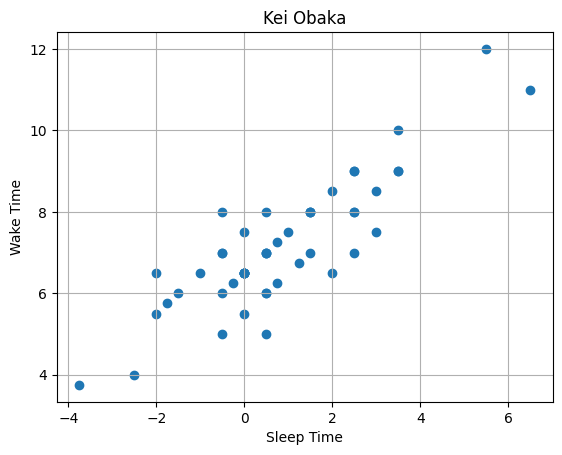

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['寝た時間'], df['起きた時間']) # 平均部屋数と住宅価格の散布図をプロット

plt.title('Kei Obaka')    # 図のタイトル
plt.xlabel('Sleep Time') # x軸のラベル
plt.ylabel('Wake Time')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show() 

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = df[['寝た時間']].values         # 説明変数（Numpyの配列）
Y = df['起きた時間'].values         # 目的変数（Numpyの配列）

lr.fit(X, Y)                         # 線形モデルの重みを学習

LinearRegression()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 0) # データを学習用と検証用に分割

lr = LinearRegression()
lr.fit(X_train, Y_train) # 線形モデルの重みを学習

LinearRegression()

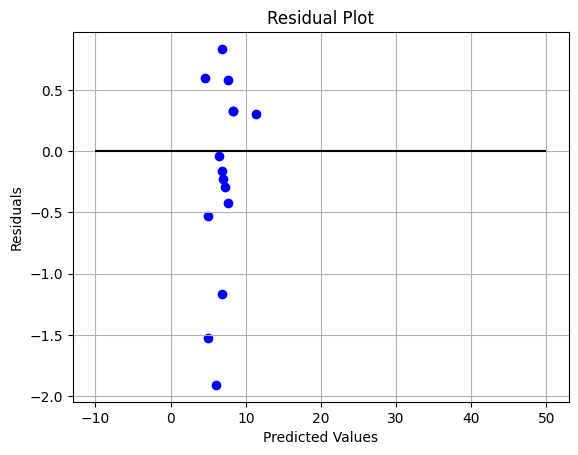

In [26]:
Y_pred = lr.predict(X_test) # 検証データを用いて目的変数を予測

plt.scatter(Y_pred, Y_pred - Y_test, color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black') # x軸に沿った直線をプロット
plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()   

In [33]:
data = [[5.5], [3.5]]
pred = lr.predict(data)
print(pred)
#print(X_test)

[10.56151307  9.07118385]
